In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import QuadraticAnalysisToolkit as QAT

In [3]:
# Info to set up analysis
lo = [0.01, 0.3]
hi = [0.1, 0.9]
ndim = 2
csvfile = 'output2.csv'
csvdelimiter = ','
skipheader = 1
nensemble = 6

In [4]:
# Open the csv file in a Grid object
fullgrid = QAT.Grid()
fullgrid.initFromCSV(csvfile, delimiter=csvdelimiter, skip_header=skipheader)

emsg = ''

# Make sure grid is the same dimensionality as lo and hi
if ndim != fullgrid.dm:
    emsg = 'ERROR: Boundary lists should be the same length as the csv point dimensionality.'

# Check to make sure the grid is large enough for quadratic analysis
npoints_required = ndim*(ndim-1)/2 + 2*ndim + 1
if len(fullgrid.points) < npoints_required:
    emsg = 'ERROR: Cannot perform quadratic analysis in {} dimensions with fewer than {} points.'.format(ndim, npoints_required)
    
if not emsg:
    print('Finished input sanity check, proceed.')

Finished input sanity check, proceed.


In [5]:
ensemble_quads = []

success = True
max_size_ensemble = 1000

# Do sampling of the points
for i, samplepts in enumerate(itertools.combinations(fullgrid.points, nensemble)):
    if i == max_size_ensemble:
        break
    print('running combination {} with {} points.'.format(i, len(samplepts)))
    g = QAT.Grid(samplepts)
    qa = QAT.QuadraticAnalysis(g, lo, hi)
    success = success and qa.eopt.success
    if not success:
        write('ERROR: ensemble analyis failed at combination {}!'.format(i))
        break
    else:
        ensemble_quads.append(qa)

running combination 0 with 6 points.
running combination 1 with 6 points.
running combination 2 with 6 points.


/home/eugene/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:348: RuntimeWarning: divide by zero encountered in true_divide
  f += hp**2 / (4. * (mup + x)**2)
/home/eugene/codes/astro/StarSTRUQ/UQ-mesa/QuadraticAnalysisToolkit.py:348: RuntimeWarning: divide by zero encountered in double_scalars
  f += hp**2 / (4. * (mup + x)**2)


running combination 3 with 6 points.
running combination 4 with 6 points.
running combination 5 with 6 points.
running combination 6 with 6 points.
running combination 7 with 6 points.
running combination 8 with 6 points.
running combination 9 with 6 points.
running combination 10 with 6 points.
running combination 11 with 6 points.
running combination 12 with 6 points.
running combination 13 with 6 points.
running combination 14 with 6 points.
running combination 15 with 6 points.
running combination 16 with 6 points.
running combination 17 with 6 points.
running combination 18 with 6 points.
running combination 19 with 6 points.
running combination 20 with 6 points.
running combination 21 with 6 points.
running combination 22 with 6 points.
running combination 23 with 6 points.
running combination 24 with 6 points.
running combination 25 with 6 points.
running combination 26 with 6 points.
running combination 27 with 6 points.
running combination 28 with 6 points.
running combination

In [6]:
# Collect each fit coefficient
fitcs = [[] for i in range(int(npoints_required))]
for qa in ensemble_quads:
    for fc, coeffs in zip(fitcs, qa.qfit.coefficients):
        fc.append(coeffs)

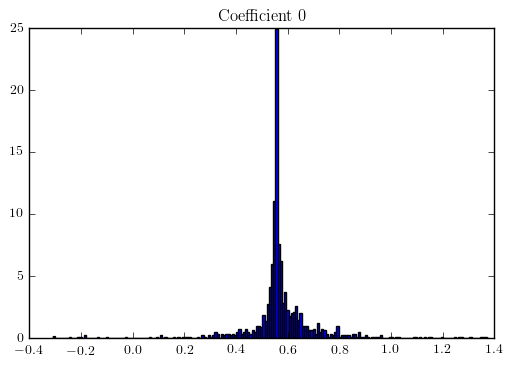

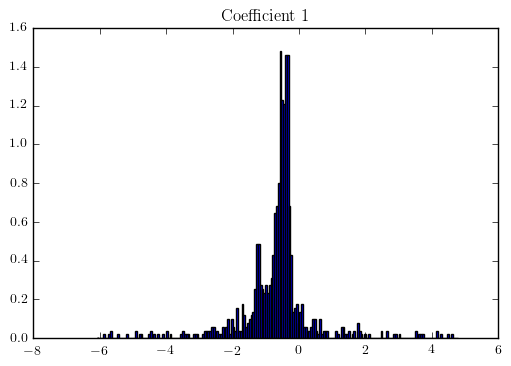

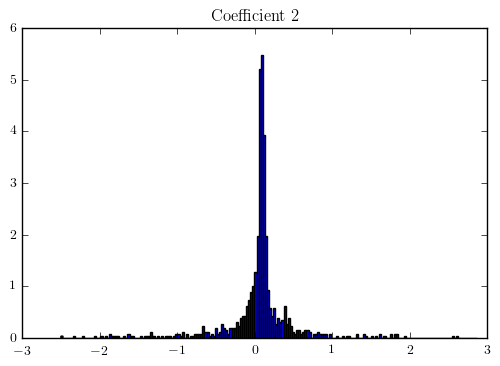

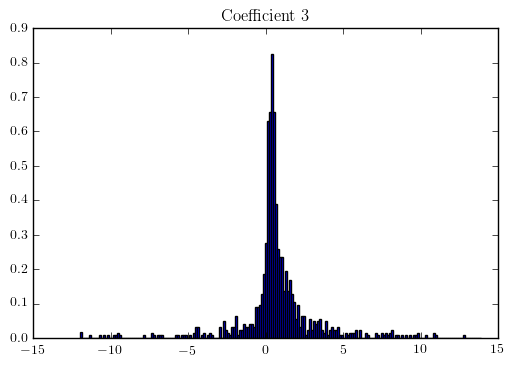

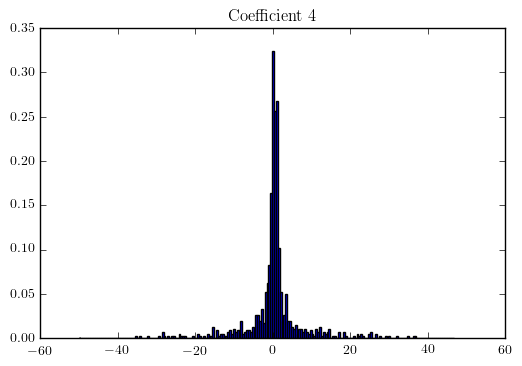

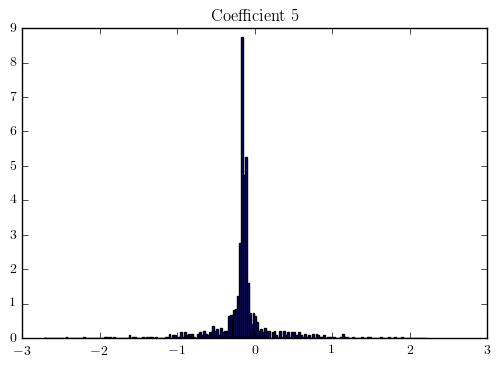

In [10]:
# Make histograms of the fit coefficients
for i, cs in enumerate(fitcs):
    avecs = np.mean(cs)
    stdcs = np.std(cs)
    plt.figure()
    n, bins, patches = plt.hist(cs, 200, normed=True, range=(avecs-stdcs, avecs+stdcs))
    plt.title('Coefficient {}'.format(i))

[  0.19839687   0.           0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.
   0.19839687   0.           0.           0.           0.           0.           0.
   0.           0.           0.19839687   0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.19839687
   0.           0.           0.           0.           0.           0.           0.
   0.19839687   0.           0.           0.           0.           0.           0.
   0.19839687   0.           0.           0.           0.           0.19839687
   0.19839687   0.19839687   0.39679374   0.           0.           0.
   0.19839687   0.           0.19839687   0.           0.19839687
   0.19839687   0.           0.19839687   0.19839687   0.           0.19839687
   0.19839687   0.19839687   0.19839687   0.19839687   0.           0.19839687
   0.19839687   0.           0.           0.39679374   0

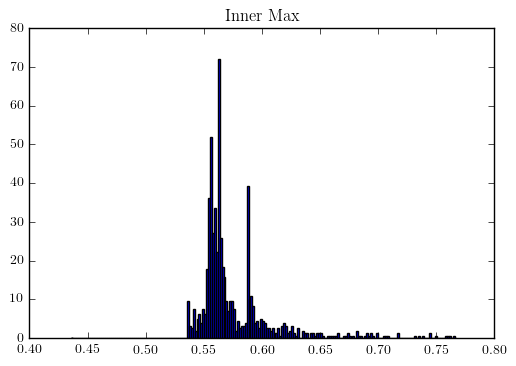

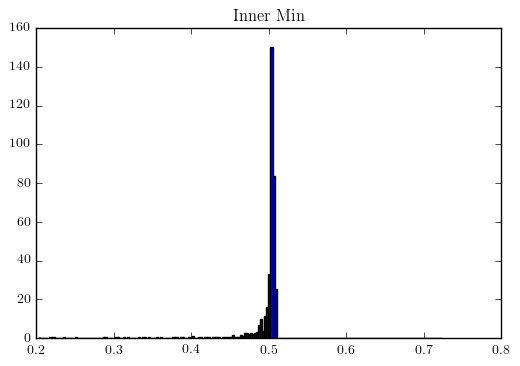

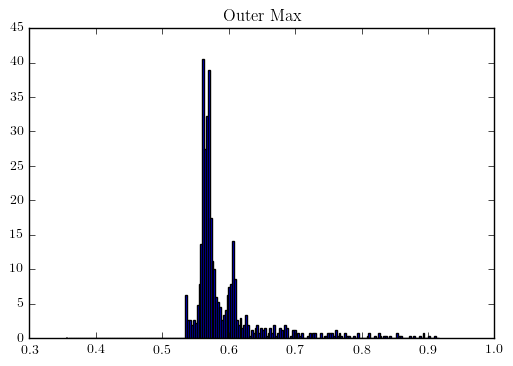

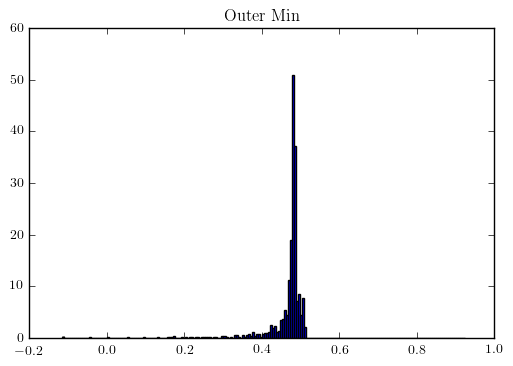

In [11]:
# Collect each inner and outer max/mins and make histograms
inner_maxs = []
for qa in ensemble_quads:
    inner_maxs.append(qa.eopt.inner_max)
ave = np.mean(inner_maxs)
std = np.std(inner_maxs)
plt.figure()
n, bins, patches = plt.hist(inner_maxs, 200, normed=True, range=(ave-std, ave+std))
plt.title('Inner Max')
    
inner_mins = []
for qa in ensemble_quads:
    inner_mins.append(qa.eopt.inner_min)
ave = np.mean(inner_mins)
std = np.std(inner_mins)
plt.figure()
n, bins, patches = plt.hist(inner_mins, 200, normed=True, range=(ave-std, ave+std))    
plt.title('Inner Min')

outer_maxs = []
for qa in ensemble_quads:
    outer_maxs.append(qa.eopt.outer_max)
ave = np.mean(outer_maxs)
std = np.std(outer_maxs)
plt.figure()
n, bins, patches = plt.hist(outer_maxs, 200, normed=True, range=(ave-std, ave+std))    
plt.title('Outer Max')

outer_mins = []
for qa in ensemble_quads:
    outer_mins.append(qa.eopt.outer_min)
ave = np.mean(outer_mins)
std = np.std(outer_mins)
plt.figure()
n, bins, patches = plt.hist(outer_mins, 200, normed=True, range=(ave-std, ave+std))
print(n)
print(bins)
print(patches)
plt.title('Outer Min')

In [12]:
def bin_centers(bin_edges):
    binc = []
    for i, be in enumerate(bin_edges):
        if i < len(bin_edges) - 2:
            bc = bin_edges[i] + 0.5*(bin_edges[i+1] - bin_edges[i])
            binc.append(bc)
        else:
            temp = bin_edges[i] + 0.5*(bin_edges[i+1] - bin_edges[i])
            bc = 0.5*(bin_edges[i] + temp)
            binc.append(bc)
            bc = 0.5*(temp + bin_edges[i+1])
            binc.append(bc)
            break
    return np.array(binc)

In [14]:
def objective(x, center, bin_values, bin_centers, confidence_limit):
    bsum = 0.0
    for v, c in zip(bin_values, bin_centers):
        if abs(c-center) <= x:
            bsum += v
    return bsum - confidence_limit 

In [ ]:
def get_confidence_limit(center, bin_values, bin_centers, confidence_limit):
    